# Slides

You can turn Jupyter notebooks into slide shows using [Reveal.js](https://github.com/hakimel/reveal.js/) through the [RISE Jupyter/IPython Slideshow Extension](https://github.com/damianavila/RISE).

See the author's post: http://www.damian.oquanta.info/posts/make-your-slides-with-ipython.html

# You can have slides...

# Planck's Law

Planck's Law describes the electromagnetic radiation emited by a black body at a given temperature for a given wavelength.

# And sub-slides...

# Equation

Planck Equation:

$$ B_{\lambda}(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1}$$

This is a fragment

And another

![An SVG Image](https://upload.wikimedia.org/wikipedia/commons/1/19/Black_body.svg)

In [1]:
import numpy as np


def planck(wavelength, temp):
    """ Return the emitted radiation from a blackbody of a given temp and wavelength
    
    Args:
        wavelength (float): wavelength (m)
        temp (float): temperature of black body (Kelvin)
        
    Returns:
        float: spectral radiance (W / (sr m^3))
        
    """
    k_b = 1.3806488e-23  # J/K  Boltzmann constant
    h = 6.626070040e-34  # J s - Planck's constant
    c = 3e8  # m/s - speed of light
    
    return ((2 * h * c ** 2) / wavelength ** 5 * 
            1 / (np.exp(h * c / (wavelength * k_b * temp)) - 1))

In [2]:
for temp in (3000, 4000, 5000):
    rad = planck(0.5e-6, temp)
    rad_kW_per_sr_m2_nm = rad / 1e3 / 1e9  # convert from W to kW and m to nm
    print('%.3f K: %.5f kW/(sr m^2 nm)' % (temp, rad_kW_per_sr_m2_nm))

3000.000 K: 0.25890 kW/(sr m^2 nm)
4000.000 K: 2.85480 kW/(sr m^2 nm)
5000.000 K: 12.07559 kW/(sr m^2 nm)


In [3]:
import matplotlib.pyplot as plt

def plot_planck(temp):
    """ Plot the spectral radiance for a blackbody of a given temperature
    
    Args:
        temp (float): temperature of body
        
    """
    wavelength = np.linspace(1e-8, 10e-6, 1000)
    
    
    rad = planck(wavelength, temp)
    
    text_x = wavelength[rad.argmax()] * 1e6
    text_y = rad.max() / 1e3 / 1e9
    temp_str = '%.2f K' % temp
    
    fig, ax = plt.subplots()
    
    ax.plot(wavelength * 1e6, rad / 1e3 / 1e9)
    ax.text(text_x, text_y, temp_str, ha='center')

    ax.set_xlabel(r'Wavelength ($\mu m$)')
    ax.set_ylabel(r'Spectral radiance ($kW \cdot sr^{-1} \cdot m^{-2} \cdot nm^{-1}$)')
    
    ax.set_xlim([1e-8 * 1e6, 10e-6 * 1e6])


<IPython.core.display.Javascript object>


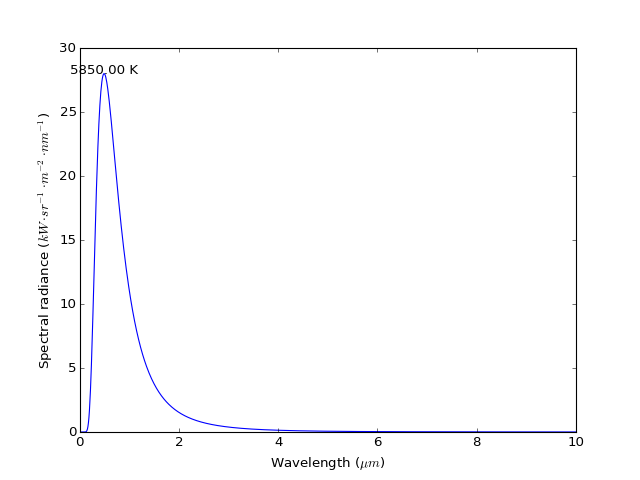

In [5]:
%matplotlib nbagg
from ipywidgets import interactive
from IPython.core.display import display

vis = interactive(plot_planck, temp=(250, 10e3, 100))
display(vis)